<a href="https://colab.research.google.com/github/grupo21dex/deliverable-1/blob/main/C%C3%B3pia_de_Deliverable_1_grupo_21.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

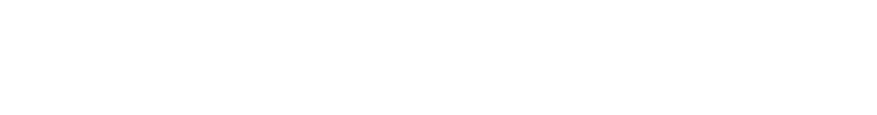

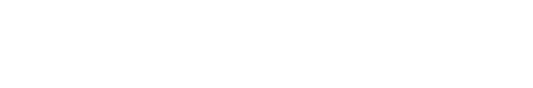

#***Grupo 21***

# Descrição das variaveis mais importantes





##1.   Documentos
*   ***kc_house_data.csv***: Arquivo original do projeto
*   ***df_cende.xlsx***: Arquivo criado para não ter necessidade de executar o código de criação do endereço






##2.   Data Frames
*    ***df***: Criado a partir do documento original.csv e depois atualizado conforme a necessidade




##3.   Colunas adicionadas
* ***address***: coluna com o endereço
* ***number***: numero
* ***street***: Rua
* ***district***: Destrito
* ***resell***: vez que a casa foi vendida entre 02-05-2014 a 27-05-15



#Bibliotecas utilizadas




In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import scipy
import geopy

---

#**ATENÇÃO**: a parte 1 não precisa ser executada, está apenas para mostrar como chegamos ao novo arquivo que será usado na parte 2 em diante



#1 Arquivo do projeto: ***kc_house_data.csv***


1.1 Criação do dataframe ***df***







In [2]:
#df = pd.read_csv('kc_house_data.csv')
#df

Com a visualização dos dados vimos que não informava o endereço, utilizamos a ***lat*** e ***long*** para acrescentar o endereço

1.2 Localização do endereço usando as colunas ***lat*** (latitude) e ***long***(longitude)

 Adicionando a coluna ***address*** ao dataframe

In [3]:
#from geopy.geocoders import Nominatim
#geolocator = Nominatim(user_agent="geoapiExercises")
#address = list()
#for x in dados.index:
  #address.append(geolocator.reverse(str(df['lat'][x])+','+str(df['long'][x])))

1.3 Criando novo documento, pois a criação da coluna endereço foi demorada



In [4]:
#df.to_excel("enderecos.xlsx") 



---



#2 Utilizando o documento ***df_cende.xlsx***

2.1 Atualizando o dataframe ***df***

In [5]:
df = pd.read_excel('df_cende.xlsx') 

##2.2 Adicionando novas colunas ao dataframe
2.2.1 Adicionando as colunas ***number, street, district, city, county, state,number2, country, x e y*** tiradas da separação da coluna endereço

In [6]:
df[['number','street','district','city','county', 'state','number2','country','x','y']] = df['address'].str.split(',', expand=True)

2.2.2 Adicionando colunas ***area/lot***

In [7]:
df['price/lot'] = df['price'] / df['sqft_lot']

2.2.3 Adicionando a coluna ***area/living***

In [8]:
df['price/living'] = df['price'] / df['sqft_living']

2.2.4 Adicionando a coluna ***resell***

In [9]:
unico = list()
repetido = list()
for x in df['id']:
  unico.append(x)
  repetido.append(unico.count(x))
df['resell'] = repetido

2.2.5 Adicionando coluna ***Mês da Venda*** e ***Ano da Venda***

In [10]:
df['date'] = df['date'].astype(np.datetime64)
df['Ano da Venda'] = df['date'].dt.year
df['Mês da Venda'] = df['date'].dt.month

2.3 Verificando os dados

In [11]:
print(df.dtypes)

Unnamed: 0                int64
id                        int64
date             datetime64[ns]
price                     int64
bedrooms                  int64
bathrooms               float64
sqft_living               int64
sqft_lot                  int64
floors                  float64
waterfront                int64
view                      int64
condition                 int64
grade                     int64
sqft_above                int64
sqft_basement             int64
yr_built                  int64
yr_renovated              int64
zipcode                   int64
lat                     float64
long                    float64
sqft_living15             int64
sqft_lot15                int64
address                  object
number                   object
street                   object
district                 object
city                     object
county                   object
state                    object
number2                  object
country                  object
x       

In [12]:
df.isnull().sum()

Unnamed: 0           0
id                   0
date                 0
price                0
bedrooms             0
bathrooms            0
sqft_living          0
sqft_lot             0
floors               0
waterfront           0
view                 0
condition            0
grade                0
sqft_above           0
sqft_basement        0
yr_built             0
yr_renovated         0
zipcode              0
lat                  0
long                 0
sqft_living15        0
sqft_lot15           0
address              0
number               0
street               0
district             0
city                 2
county              38
state              210
number2            863
country           7677
x                18034
y                21563
price/lot            0
price/living         0
resell               0
Ano da Venda         0
Mês da Venda         0
dtype: int64

In [13]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21613 entries, 0 to 21612
Data columns (total 38 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   Unnamed: 0     21613 non-null  int64         
 1   id             21613 non-null  int64         
 2   date           21613 non-null  datetime64[ns]
 3   price          21613 non-null  int64         
 4   bedrooms       21613 non-null  int64         
 5   bathrooms      21613 non-null  float64       
 6   sqft_living    21613 non-null  int64         
 7   sqft_lot       21613 non-null  int64         
 8   floors         21613 non-null  float64       
 9   waterfront     21613 non-null  int64         
 10  view           21613 non-null  int64         
 11  condition      21613 non-null  int64         
 12  grade          21613 non-null  int64         
 13  sqft_above     21613 non-null  int64         
 14  sqft_basement  21613 non-null  int64         
 15  yr_built       2161

---

#3 Remoção de dados desnecessários 

3.1 Removendo linhas

3.1.1Verificando quantas vezes os imoveis foram vendidos

In [14]:
df['resell'] = df['resell'].astype(int)
df['resell'].value_counts()

1    21436
2      176
3        1
Name: resell, dtype: int64

3.1.2 Localizando pelo 'id' o imóvel que foi vendido a terceira vez

In [15]:
for x in df[df['resell']==3]['id']:
  print(x)

795000620


3.1.3 Removendo a linha ***17604*** que representa a terceira venda, verificamos que somente um imóvel teve a terceira venda e o lucro dessa venda nao esta entre as melhores nem as piores, portanto removemos pois não influenciaria em nosso resultado

In [16]:
df = df.drop([17604],axis = 0)

3.2 Removendo colunas

3.2.1 Remover as colunas ***city, county, state,number2, country, x e y***. 
Colunas não necessárias por serem comuns a todas as residencias e/ou conter erros

In [17]:
df = df.drop(['city', 'county', 'state','number2', 'country', 'x', 'y'], axis =1)

3.2.2 Removendo a coluna ***address***
foi utilizada para criar outras colunas

In [18]:
df = df.drop(['address'], axis = 1)

---

#4 Verificando o lucro das casas que foram vendidas mais de uma vez

4.1 criando variaveis que serão usadas para calcular o lucro, só serão utilizadas para isso

In [19]:
df_imoveisv1 = df[df['resell'] == 1]
df_imoveisv1 = df_imoveisv1[['id','date','price', 'resell']]
df_imoveisv1.rename(columns={'date': 'Date_1ªvenda'}, inplace=True) 
df_imoveisv1.rename(columns={'price': 'price_1ªvenda'}, inplace=True) 

df_imoveisv2 = df[df['resell'] == 2]
df_imoveisv2 = df_imoveisv2[['id','date','price', 'resell']]
df_imoveisv2.rename(columns={'date': 'Date_2ªvenda'}, inplace=True) 
df_imoveisv2.rename(columns={'price': 'price_2ªvenda'}, inplace=True)

In [20]:
df_imoveis1e2 = df_imoveisv1[['id','Date_1ªvenda','price_1ªvenda']].merge(df_imoveisv2[['id','Date_2ªvenda','price_2ªvenda']], on='id')
df_imoveis1e2['Lucro'] = df_imoveis1e2['price_2ªvenda'] - df_imoveis1e2['price_1ªvenda']
display(df_imoveis1e2.sort_values(by=['Lucro']))

,id,Date_1ªvenda,price_1ªvenda,Date_2ªvenda,price_2ªvenda,Lucro
118,7167000040,2014-08-13,740000,2015-03-05,700000,-40000
42,2726049071,2014-12-11,510000,2015-04-08,489950,-20050
59,4139420590,2014-05-20,1212500,2014-08-27,1200000,-12500
91,2767603612,2014-05-12,500000,2015-01-13,489000,-11000
7,8682262400,2014-07-18,430000,2015-05-13,419950,-10050
...,...,...,...,...,...,...
82,2568300045,2014-06-25,305000,2015-03-19,649950,344950
77,4443800385,2014-08-18,410000,2015-05-06,778100,368100
26,7409700215,2014-06-06,550000,2015-03-13,921500,371500
70,7977201065,2014-11-04,350000,2015-03-05,740000,390000


Criando

In [21]:
df_lucro = df.join(df_imoveis1e2[['Lucro']], how = 'left', lsuffix='left', rsuffix='right' ).copy()
df_lucro

,Unnamed: 0,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,...,sqft_lot15,number,street,district,price/lot,price/living,resell,Ano da Venda,Mês da Venda,Lucro
0,0,7129300520,2014-10-13,221900,3,1.00,1180,5650,1.0,0,...,5650,10012,61st Avenue South,Rainier Beach,39.274336,188.050847,1,2014,10,270000.0
1,1,6414100192,2014-12-09,538000,3,2.25,2570,7242,2.0,0,...,7639,837,Northeast 127th Street,Northgate,74.288870,209.338521,1,2014,12,16000.0
2,2,5631500400,2015-02-25,180000,2,1.00,770,10000,1.0,0,...,8062,15109,81st Avenue Northeast,Moorlands,18.000000,233.766234,1,2015,2,8500.0
3,3,2487200875,2014-12-09,604000,4,3.00,1960,5000,1.0,0,...,5000,9236,Fauntleroy Way Southwest,Fauntleroy,120.800000,308.163265,1,2014,12,74900.0
4,4,1954400510,2015-02-18,510000,3,2.00,1680,8080,1.0,0,...,7503,923,221st Avenue Northeast,Sammamish,63.118812,303.571429,1,2015,2,215000.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21608,21608,263000018,2014-05-21,360000,3,2.50,1530,1131,3.0,0,...,1509,927,North 97th Street,Licton Springs,318.302387,235.294118,1,2014,5,NaN
21609,21609,6600060120,2015-02-23,400000,4,2.50,2310,5813,2.0,0,...,7200,2211,Southwest 103rd Place,White Center,68.811285,173.160173,1,2015,2,NaN
21610,21610,1523300141,2014-06-23,402101,2,0.75,1020,1350,2.0,0,...,2007,902,26th Avenue South,Leschi,297.852593,394.216667,1,2014,6,NaN
21611,21611,291310100,2015-01-16,400000,3,2.50,1600,2388,2.0,0,...,1287,2136,Northwest Boulder Way Drive,Talus,167.504188,250.000000,1,2015,1,NaN


4.1.1 Data frame com ordem decrescente usando os valores do lucro como métrica

Usado para verificar os maiores lucros

In [22]:
display(df_lucro.sort_values(by=['Lucro'],ascending=False))

,Unnamed: 0,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,...,sqft_lot15,number,street,district,price/lot,price/living,resell,Ano da Venda,Mês da Venda,Lucro
168,168,3261020370,2014-06-05,653000,3,2.50,2680,9750,1.0,0,...,8750,8236,Northeast 115th Way,Kirkland,66.974359,243.656716,1,2014,6,529950.0
70,70,1525059190,2014-09-12,1040000,5,3.25,4770,50094,1.0,0,...,38917,13511,Northeast 50th Street,Bellevue,20.760969,218.029350,1,2014,9,390000.0
26,26,1794500383,2014-06-26,937000,3,1.75,2450,2691,2.0,0,...,3573,206,West Boston Street,Queen Anne,348.197696,382.448980,1,2014,6,371500.0
77,77,2391600320,2015-04-20,480000,3,1.00,1040,5060,1.0,0,...,5060,4441,48th Avenue Southwest,West Seattle,94.861660,461.538462,1,2015,4,368100.0
82,82,9418400240,2014-10-28,355000,2,1.00,2020,6720,1.0,0,...,6720,6018,32nd Avenue South,Holly Park,52.827381,175.742574,1,2014,10,344950.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21608,21608,263000018,2014-05-21,360000,3,2.50,1530,1131,3.0,0,...,1509,927,North 97th Street,Licton Springs,318.302387,235.294118,1,2014,5,NaN
21609,21609,6600060120,2015-02-23,400000,4,2.50,2310,5813,2.0,0,...,7200,2211,Southwest 103rd Place,White Center,68.811285,173.160173,1,2015,2,NaN
21610,21610,1523300141,2014-06-23,402101,2,0.75,1020,1350,2.0,0,...,2007,902,26th Avenue South,Leschi,297.852593,394.216667,1,2014,6,NaN
21611,21611,291310100,2015-01-16,400000,3,2.50,1600,2388,2.0,0,...,1287,2136,Northwest Boulder Way Drive,Talus,167.504188,250.000000,1,2015,1,NaN


4.1.2 Data frame com ordem decrescente usando os valores do lucro como métrica

Usado para verificarmos os maiores prejuizos

In [23]:
display(df_lucro.sort_values(by=['Lucro'],ascending=True))

,Unnamed: 0,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,...,sqft_lot15,number,street,district,price/lot,price/living,resell,Ano da Venda,Mês da Venda,Lucro
118,118,3454800060,2015-01-08,171800,4,2.00,1570,9600,1.0,0,...,9000,11834,Military Road South,Boulevard Park,17.895833,109.426752,1,2015,1,-40000.0
42,42,7203220400,2014-07-07,861990,5,2.75,3595,5639,2.0,0,...,5639,9704,242nd Way Northeast,Deveron,152.862210,239.774687,1,2014,7,-20050.0
59,59,8079040320,2015-02-23,430000,4,3.00,1850,9976,2.0,0,...,8542,1520,Ilwaco Avenue Northeast,Summerwind,43.103448,232.432432,1,2015,2,-12500.0
91,91,5036300431,2015-03-11,1099880,5,2.75,3520,6353,2.0,0,...,6250,2650,West Bertona Street,Lawton Park,173.127656,312.465909,1,2015,3,-11000.0
7,7,2008000270,2015-01-15,291850,3,1.50,1060,9711,1.0,0,...,9711,21421,14th Avenue South,Des Moines Creek,30.053548,275.330189,1,2015,1,-10050.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21608,21608,263000018,2014-05-21,360000,3,2.50,1530,1131,3.0,0,...,1509,927,North 97th Street,Licton Springs,318.302387,235.294118,1,2014,5,NaN
21609,21609,6600060120,2015-02-23,400000,4,2.50,2310,5813,2.0,0,...,7200,2211,Southwest 103rd Place,White Center,68.811285,173.160173,1,2015,2,NaN
21610,21610,1523300141,2014-06-23,402101,2,0.75,1020,1350,2.0,0,...,2007,902,26th Avenue South,Leschi,297.852593,394.216667,1,2014,6,NaN
21611,21611,291310100,2015-01-16,400000,3,2.50,1600,2388,2.0,0,...,1287,2136,Northwest Boulder Way Drive,Talus,167.504188,250.000000,1,2015,1,NaN


#5 Criação de gráficos

5.1 Gráfico de barra com a quantidade de venda nos meses

Text(0, 0.5, 'Count')

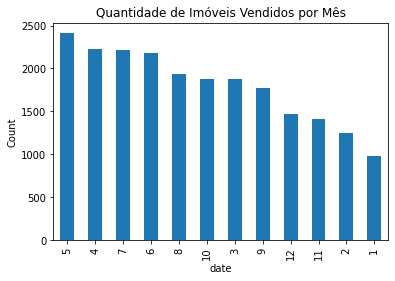

In [24]:
df['Mês da Venda'].value_counts().plot(kind='bar')
plt.title('Quantidade de Imóveis Vendidos por Mês')
plt.xlabel('date')
plt.ylabel('Count')

5.2 Gráfico de correlação de calor, removendo as colunas ***id, zipcode, lat, long, Ano da Venda e Mês da Venda***, pois não ajudam na visualização da correlação

In [25]:
df_lucro.drop(['id','lat','long','Ano da Venda','Mês da Venda'],axis = 1).corr()['Lucro']

Unnamed: 0      -0.013821
price            0.127754
bedrooms        -0.000579
bathrooms        0.020081
sqft_living      0.129565
sqft_lot         0.102967
floors          -0.079126
waterfront      -0.097038
view             0.019148
condition       -0.036849
grade            0.138041
sqft_above       0.032370
sqft_basement    0.185971
yr_built        -0.029272
yr_renovated    -0.167748
zipcode          0.017925
sqft_living15    0.074135
sqft_lot15       0.042511
price/lot        0.044342
price/living     0.069769
resell           0.142156
Lucro            1.000000
Name: Lucro, dtype: float64

5.3 Gráficos do zipcode do imóvel do melhor lucro

5.3.1 Imóvel de maior lucro

Grafico com barras mostrando a região do imóvel que verificamos o maior lucro

Criando o data frame ***df_lucros*** que contém os imóveis que foram vendidos 2 vezes

In [26]:
venda2 = df[df['resell']==2]
idvenda2 = df[df['resell']==2]['id']
precovenda2 = df[df['resell']==2]['price']

# calculando o lucro
precovenda = list()
lucro = list()
for id in idvenda2:
  precovenda.append(df[df['id']==id]['price'])

#df apenas com o preço quando o imovel foi vendido a segunda vez
df_imven = pd.DataFrame(precovenda).transpose().groupby(level=0, axis=1).sum()

#pegando apenas o valor da coluna preço
lista = df_imven['price'].values.tolist()

#codigo para calcular o lucro
lucro = list()
auxiliar = 0
lista = df_imven['price'].values.tolist()
for x in range(0, len(lista)+1, 2):        
  if x == len(lista):
      break
  else:
      auxiliar = lista[x+1] - lista[x]
      lucro.append(auxiliar)

df_lucros = df[df['resell']==2].copy()

df_lucros['Lucro'] = lucro

5.3 Gráfico de dispersão, das casas com maiores lucros

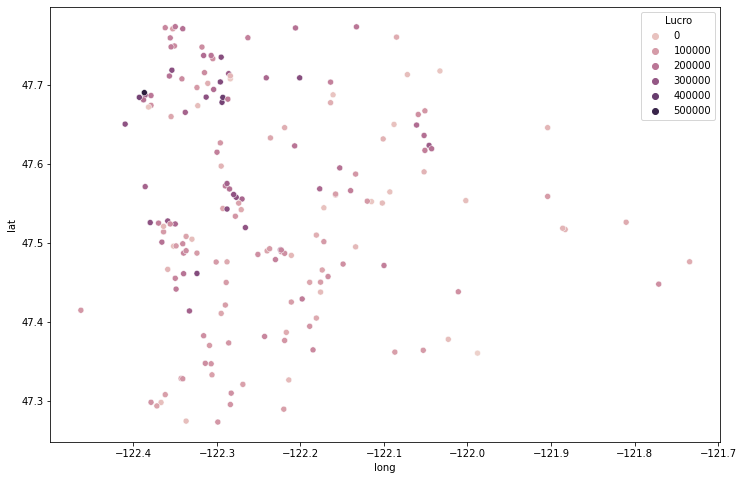

In [27]:
plt.figure(figsize=(12,8))
sns.scatterplot(x='long',y='lat',data=df_lucros,hue='Lucro')

In [28]:
'''sns.pairplot(df_lucros)
df_lucros.corr()'''

'sns.pairplot(df_lucros)\ndf_lucros.corr()'

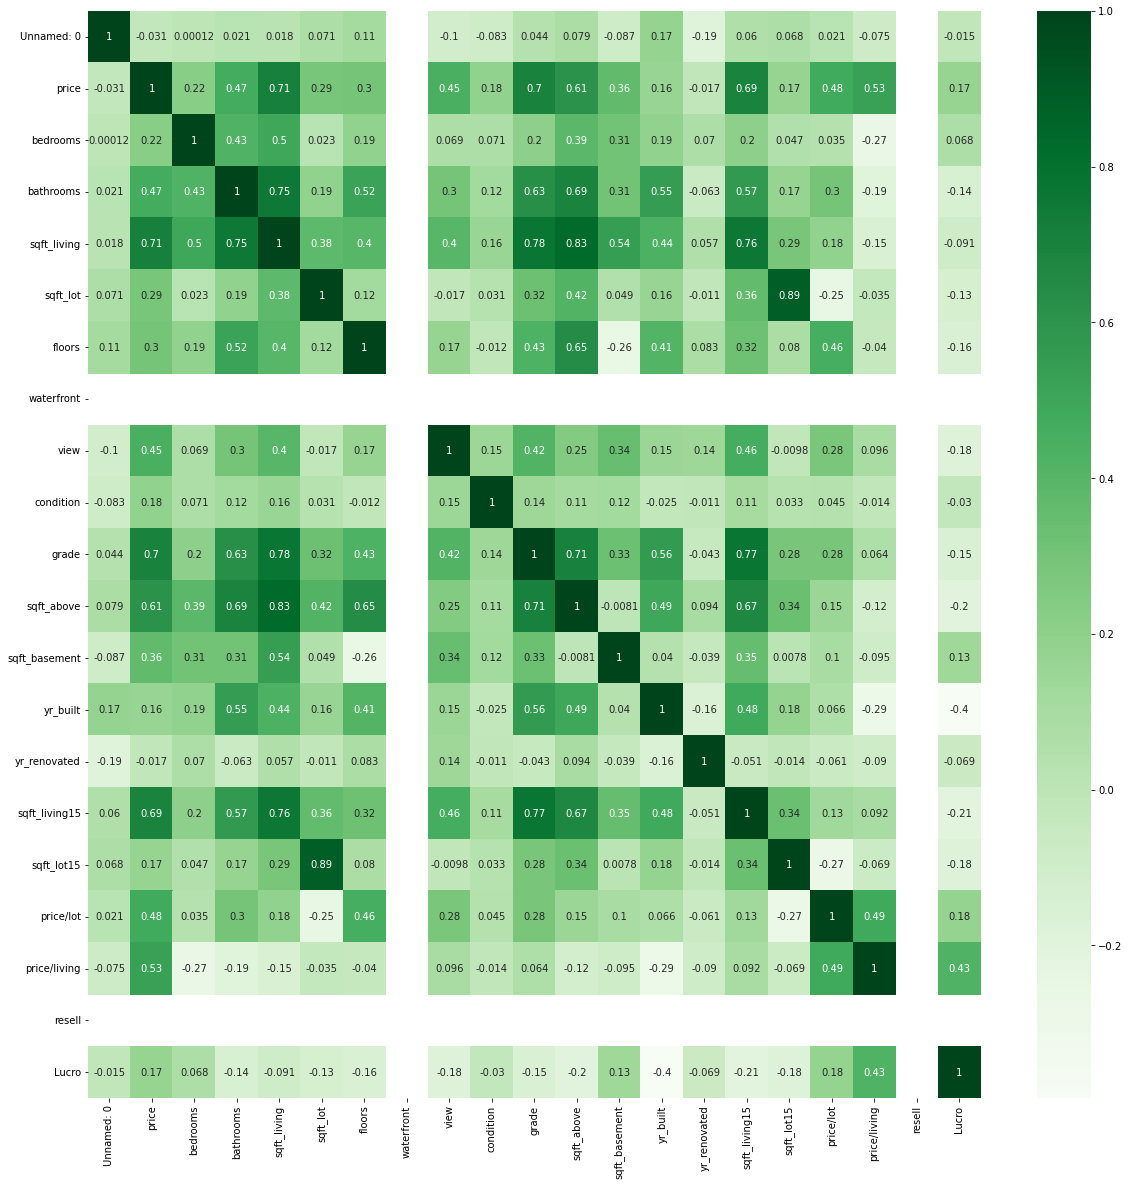

In [29]:
plt.figure(figsize = (20,20))
sns.heatmap(df_lucros.drop(['id','zipcode','lat','long','Ano da Venda','Mês da Venda'],axis = 1).corr(),  annot=True, cmap='Greens')

In [30]:
df_lucros.drop(['id','zipcode','lat','long','Ano da Venda','Mês da Venda'],axis = 1).corr()['Lucro']

Unnamed: 0      -0.014585
price            0.167553
bedrooms         0.068418
bathrooms       -0.141893
sqft_living     -0.090998
sqft_lot        -0.127869
floors          -0.155461
waterfront            NaN
view            -0.177504
condition       -0.030119
grade           -0.154196
sqft_above      -0.196604
sqft_basement    0.134111
yr_built        -0.395881
yr_renovated    -0.068669
sqft_living15   -0.205513
sqft_lot15      -0.178396
price/lot        0.180809
price/living     0.426498
resell                NaN
Lucro            1.000000
Name: Lucro, dtype: float64

Concluimos que as demais colunas tem baixa correlação com o lucro

Verificando relação entre o ***zipcode*** e o lucro

Localizando o maior lucro e a maior perda

In [31]:
display(df_lucros.sort_values(by=['Lucro'],ascending=True))

,Unnamed: 0,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,...,sqft_lot15,number,street,district,price/lot,price/living,resell,Ano da Venda,Mês da Venda,Lucro
13299,13299,7167000040,2015-03-05,700000,4,3.00,3350,199253,2.0,0,...,183897,26719,Southeast 271st Street,King County,3.513122,208.955224,2,2015,3,-40000.0
5593,5593,2726049071,2015-04-08,489950,2,1.00,820,4206,1.0,0,...,7200,4034,Northeast 109th Street,Alicia Park,116.488350,597.500000,2,2015,4,-20050.0
7846,7846,4139420590,2014-08-27,1200000,4,3.50,4560,16643,1.0,0,...,15177,16898,Southeast 57th Place,Bellevue,72.102385,263.157895,2,2014,8,-12500.0
10611,10611,2767603612,2015-01-13,489000,2,2.25,1290,1334,3.0,0,...,1334,5900,20th Avenue Northwest,Ballard,366.566717,379.069767,2,2015,1,-11000.0
837,837,8682262400,2015-05-13,419950,2,1.75,1350,4003,1.0,0,...,4479,22841,Northeast 132nd Place,Meadows,104.908818,311.074074,2,2015,5,-10050.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9721,9721,2568300045,2015-03-19,649950,6,2.00,1900,8240,1.0,0,...,8240,2825 A,Northeast 105th Street,Alicia Park,78.877427,342.078947,2,2015,3,344950.0
9280,9280,4443800385,2015-05-06,778100,2,1.00,1480,4080,1.0,0,...,4080,7536,28th Avenue Northwest,Loyal Heights,190.710784,525.743243,2,2015,5,368100.0
3299,3299,7409700215,2015-03-13,921500,3,1.50,1900,5000,1.5,0,...,5000,6812,31st Avenue Northeast,Ravenna,184.300000,485.000000,2,2015,3,371500.0
8916,8916,7977201065,2015-03-05,740000,3,1.75,1380,4590,1.0,0,...,4692,7533,33rd Avenue Northeast,Wedgwood,161.220044,536.231884,2,2015,3,390000.0


---

Calcular a média dos lucros por zipcode para descobrir o zipcode com a maior valorização

Criado azip, que contém o zipcode de todas as casas que foram vendidas mais de uma vez

In [32]:
azip = list()
for zip in df_lucros['zipcode']:
  if zip not in azip:
    azip.append(zip)
len(azip)

59

In [ ]:
areaszip_lucro = list()
for area in azip:
  areaszip_lucro.append(df_lucros[df_lucros['zipcode']==area])
areaszip_lucro
#df_areaszip_lucro = pd.DataFrame(areaszip_lucro[0]).copy()

Criado o dataframe df_areazip que tem todas os imóveis da areas

criar dataframe com os zipcodes e as medias de lucro em cada zip code

In [ ]:
areaszip_lucro

Lista com a media dos lucros de cada zipcode q teve revenda

In [ ]:
media_lucro = list()
for z,v in enumerate(areaszip_lucro):
  media_lucro.append(areaszip_lucro[z]['Lucro'].mean())
media_lucro

#areaszip_lucro[0]['Lucro'].mean()

In [37]:
df_lucro_idl = pd.DataFrame(areaszip_lucro)
df_lucro_idl['media de lucro'] = media_lucro
df_lucro_idl['zipcode'] = azip


/usr/local/lib/python3.7/dist-packages/pandas/core/internals/construction.py:540: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  values = np.array([convert(v) for v in values])


In [38]:
df_lucro_idl

,0,media de lucro,zipcode
0,Unnamed: 0 id date pri...,317010.000000,98117
1,Unnamed: 0 id date pr...,80240.125000,98006
2,Unnamed: 0 id date pri...,117157.142857,98146
3,Unnamed: 0 id date pri...,143725.000000,98178
4,Unnamed: 0 id date pri...,184502.000000,98133
5,Unnamed: 0 id date pri...,135271.428571,98125
6,Unnamed: 0 id date pr...,75025.000000,98053
7,Unnamed: 0 id date pri...,162833.333333,98144
8,Unnamed: 0 id date pri...,72250.000000,98056
9,Unnamed: 0 id date pri...,219355.555556,98118


In [60]:
df[df['zipcode']==98010]

,Unnamed: 0,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,...,sqft_living15,sqft_lot15,number,street,district,price/lot,price/living,resell,Ano da Venda,Mês da Venda
79,79,1531000030,2015-03-23,720000,4,2.50,3450,39683,2.0,0,...,3350,39750,Black Bear Trail,Henrys,King County,18.143790,208.695652,1,2015,3
236,236,4058000060,2015-04-09,416000,3,2.00,2220,94300,1.0,0,...,2070,80100,28425,296th Avenue Southeast,King County,4.411453,187.387387,1,2015,4
534,534,1521069070,2015-02-18,204000,3,1.00,1040,7405,1.0,0,...,1580,7405,32451,Lynch Lane,Morganville,27.548953,196.153846,1,2015,2
602,602,4233400340,2014-08-20,185000,3,1.75,1430,10816,2.0,0,...,1560,10816,Green River Gorge Road,Lawson Hill Estates,Black Diamond,17.104290,129.370629,1,2014,8
719,719,4233400400,2015-04-14,267000,3,2.00,1300,9644,1.0,0,...,1430,9656,32513,McKay Lane,Lawson Hill Estates,27.685608,205.384615,1,2015,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19285,19285,844001145,2015-03-26,208500,2,1.00,880,4814,1.0,0,...,1010,6160,25728,Lawson Street,Lawson Hill Estates,43.311176,236.931818,1,2015,3
19892,19892,2140950160,2015-02-22,390000,4,2.50,2610,7227,2.0,0,...,2630,7421,32116,Sunny Lane,Morganville,53.964301,149.425287,1,2015,2
20203,20203,821079102,2014-10-17,780000,4,3.50,3720,213073,1.0,0,...,2190,59241,30213,Southeast 312th Way,Black Diamond,3.660717,209.677419,1,2014,10
21259,21259,2140950130,2014-09-11,440000,4,2.50,2990,7928,2.0,0,...,2810,7401,23895,Fairfax Street,Morganville,55.499495,147.157191,1,2014,9


Verificando a maior média

In [39]:
df_lucro_idl['media de lucro'].max()

339500.0

Verificando o zipcode da maior média

In [53]:
df_lucro_idl[df_lucro_idl['media de lucro']==339500.0]['zipcode']

51    98148
Name: zipcode, dtype: int64

usando o zipcode da maior média para verificar os imóveis da região

In [58]:
df_tops = df[df['zipcode']==98148]

Colocando em ordem crescente de acordo com o ***price/living***

In [65]:
df[df['district'] == 'North Hill']

,Unnamed: 0,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,...,sqft_living15,sqft_lot15,number,street,district,price/lot,price/living,resell,Ano da Venda,Mês da Venda


In [59]:
df_tops.sort_values(by=['price/living'],ascending=True)

,Unnamed: 0,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,...,sqft_living15,sqft_lot15,number,street,district,price/lot,price/living,resell,Ano da Venda,Mês da Venda
15442,15442,6121800050,2014-10-29,195000,4,1.50,2170,9948,2.0,0,...,1500,9750,19625,4th Avenue South,North Hill,19.601930,89.861751,1,2014,10
3902,3902,3223049131,2014-10-30,270000,4,2.50,2490,11650,1.0,0,...,2010,10495,18021,2nd Place South,Burien,23.175966,108.433735,1,2014,10
13628,13628,2023049218,2014-07-16,105500,2,1.00,930,7740,1.0,0,...,1620,8584,648,South 159th Street,Five Corners,13.630491,113.440860,1,2014,7
17871,17871,2923049393,2014-08-13,278000,4,2.25,2400,7738,1.5,0,...,2170,8452,249,South 163rd Place,Five Corners,35.926596,115.833333,1,2014,8
15550,15550,2023049372,2014-11-07,339950,4,2.25,2670,9040,1.0,0,...,1880,2648,Highline,Burien,King County,37.605088,127.322097,1,2014,11
5910,5910,2923049421,2014-07-02,250000,3,2.25,1920,7738,1.0,0,...,2170,8452,249,South 163rd Place,Five Corners,32.308090,130.208333,1,2014,7
2659,2659,7957600075,2015-04-06,202500,3,1.50,1510,9898,1.0,0,...,1420,9250,167,South 192nd Place,North Hill,20.458679,134.105960,1,2015,4
19615,19615,7250000065,2014-08-25,338000,3,2.00,2440,23512,1.0,0,...,1630,19613,547,South 160th Street,Five Corners,14.375638,138.524590,1,2014,8
9166,9166,2923049399,2015-03-23,315000,3,2.25,2170,8480,1.0,0,...,2080,8452,249,South 163rd Place,Five Corners,37.146226,145.161290,1,2015,3
18586,18586,522049122,2015-04-02,195000,4,1.75,1320,7694,1.0,0,...,1620,8468,19309,8th Avenue South,North Hill,25.344424,147.727273,1,2015,4


verificando a menor média

In [41]:
df_lucro_idl['media de lucro'].min()

-40000.0

verificando o zipcode da menor média

In [54]:
df_lucro_idl[df_lucro_idl['media de lucro']==-40000.0]['zipcode']

50    98010
Name: zipcode, dtype: int64

In [63]:
df_lows = df[df['zipcode']==98010]

---

Peagando o '***zipcode***' usando o id do maior lucro

In [43]:
df_lucros[df_lucros['id']==6021500970]['zipcode']

19336    98117
Name: zipcode, dtype: int64

Imóveis com o mesmo zipcode do imóvel de maior lucro

In [44]:
df_lucros[df_lucros['zipcode']==98117]

,Unnamed: 0,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,...,sqft_lot15,number,street,district,price/lot,price/living,resell,Ano da Venda,Mês da Venda,Lucro
94,94,6021501535,2014-12-23,700000,3,1.5,1580,5000,1.0,0,...,4500,8002,Jones Avenue Northwest,Loyal Heights,140.000000,443.037975,2,2014,12,270000.0
2532,2532,1232000810,2015-03-26,537000,3,2.5,1400,4800,1.0,0,...,3840,7755,17th Avenue Northwest,Whittier Heights,111.875000,383.571429,2,2015,3,197000.0
3757,3757,1254200015,2015-04-08,625000,3,2.5,2260,5500,1.5,0,...,5355,7053,24th Avenue Northwest,Loyal Heights,113.636364,276.548673,2,2015,4,220000.0
9280,9280,4443800385,2015-05-06,778100,2,1.0,1480,4080,1.0,0,...,4080,7536,28th Avenue Northwest,Loyal Heights,190.710784,525.743243,2,2015,5,368100.0
19336,19336,6021500970,2015-04-07,874950,2,1.0,1080,4000,1.0,0,...,4240,8351,Jones Avenue Northwest,Loyal Heights,218.737500,810.138889,2,2015,4,529950.0


Criando um o dataframe ***df_tops*** com os imoveis no mesmo ***zipcode*** do imóvel de maior lucro

In [45]:
df_tops = df[df['zipcode'] == 98117].copy()

Criando um gráfico boxplot com o preço dos imoveis no mesmo ***zipcode***  do imovel de maior lucro

{'boxes': [<matplotlib.lines.Line2D at 0x7f23c83f6d90>],
 'caps': [<matplotlib.lines.Line2D at 0x7f23c83f2e90>,
 'fliers': [<matplotlib.lines.Line2D at 0x7f23c83f1510>],
 'means': [<matplotlib.lines.Line2D at 0x7f23c83ede10>],
 'medians': [<matplotlib.lines.Line2D at 0x7f23c83f1190>],
 'whiskers': [<matplotlib.lines.Line2D at 0x7f23c83f6910>,
  <matplotlib.lines.Line2D at 0x7f23c83f6390>]}

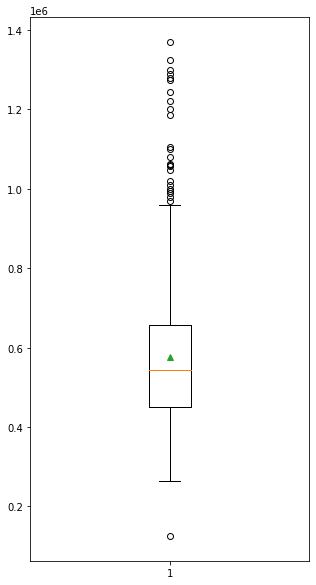

In [46]:
fig = plt.figure(figsize=(5,10))
plt.boxplot(df_tops['price'],showmeans=True)

O dataframe abaixo mostra o zipcode do imovel de maior valor, ordenada em preço por area 

In [47]:
display(df_tops.sort_values(by=['price/living'],ascending=True))

,Unnamed: 0,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,...,sqft_living15,sqft_lot15,number,street,district,price/lot,price/living,resell,Ano da Venda,Mês da Venda
16893,16893,3501100050,2014-12-10,125000,3,1.00,1230,4800,1.5,0,...,1230,4800,705,Northwest 90th Street,Crown Hill,26.041667,101.626016,1,2014,12
7887,7887,9268200348,2014-10-28,439000,5,2.00,2610,5009,1.0,0,...,1600,5040,9228,8th Avenue Northwest,Crown Hill,87.642244,168.199234,1,2014,10
115,115,3626039325,2014-11-21,740500,3,3.50,4380,6350,2.0,0,...,1830,6350,Genesis HealthCare - Ballard Center,820,Northwest 95th Street,116.614173,169.063927,1,2014,11
3756,3756,1254200015,2014-12-16,405000,3,2.50,2260,5500,1.5,0,...,1790,5355,7053,24th Avenue Northwest,Loyal Heights,73.636364,179.203540,1,2014,12
19528,19528,9165100375,2014-11-18,510000,5,2.00,2740,3838,1.0,0,...,1660,4040,7303,28th Avenue Northwest,Loyal Heights,132.881709,186.131387,1,2014,11
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3309,3309,2877101340,2015-03-18,426000,2,1.00,640,2500,1.0,0,...,1460,4200,311,Northwest 67th Street,Phinney Ridge,170.400000,665.625000,1,2015,3
5010,5010,8132700185,2015-04-16,425000,2,1.00,620,4455,1.0,0,...,1180,5000,8059,Loyal Way Northwest,Loyal Heights,95.398429,685.483871,1,2015,4
15381,15381,2856101479,2014-07-01,276000,1,0.75,370,1801,1.0,0,...,1340,5000,6703,25th Avenue Northwest,Loyal Heights,153.248195,745.945946,1,2014,7
1030,1030,2267000160,2014-10-20,900000,4,2.00,1190,8190,1.5,0,...,1190,1567,8503,31st Avenue Northwest,Loyal Heights,109.890110,756.302521,1,2014,10


Peagando o '***zipcode***' usando o id da maior perda

In [48]:
df_lucro['district'] = df['district'].str.strip()
df_lucro[df_lucro["district"] == "White Center"]

print(df.iloc[0])


Unnamed: 0                         0
id                        7129300520
date             2014-10-13 00:00:00
price                         221900
bedrooms                           3
bathrooms                        1.0
sqft_living                     1180
sqft_lot                        5650
floors                           1.0
waterfront                         0
view                               0
condition                          3
grade                              7
sqft_above                      1180
sqft_basement                      0
yr_built                        1955
yr_renovated                       0
zipcode                        98178
lat                          47.5112
long                        -122.257
sqft_living15                   1340
sqft_lot15                      5650
number                         10012
street             61st Avenue South
district               Rainier Beach
price/lot                  39.274336
price/living              188.050847
r

In [49]:
df_lucros[df_lucros['id']==7167000040]['zipcode']

13299    98010
Name: zipcode, dtype: int64

In [50]:
df_lucros[df_lucros['zipcode']==98010]

,Unnamed: 0,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,...,sqft_lot15,number,street,district,price/lot,price/living,resell,Ano da Venda,Mês da Venda,Lucro
13299,13299,7167000040,2015-03-05,700000,4,3.0,3350,199253,2.0,0,...,183897,26719,Southeast 271st Street,King County,3.513122,208.955224,2,2015,3,-40000.0


Criando o datafram ***df_lows*** que contém os imóveis no mesmo zipcode do imóvel de maior perda

In [51]:
df_lows = df[df['zipcode'] ==98010].copy()

Grafico boxplot dos preços dos imóveis de mesmo ***zipcode*** do imóvel que teve o maior perda

{'boxes': [<matplotlib.lines.Line2D at 0x7f23c7f78a90>],
 'caps': [<matplotlib.lines.Line2D at 0x7f23c83e33d0>,
 'fliers': [<matplotlib.lines.Line2D at 0x7f23c803e210>],
 'means': [<matplotlib.lines.Line2D at 0x7f23c822a490>],
 'medians': [<matplotlib.lines.Line2D at 0x7f23c83dab50>],
 'whiskers': [<matplotlib.lines.Line2D at 0x7f23c7f78750>,
  <matplotlib.lines.Line2D at 0x7f23c83e3b90>]}

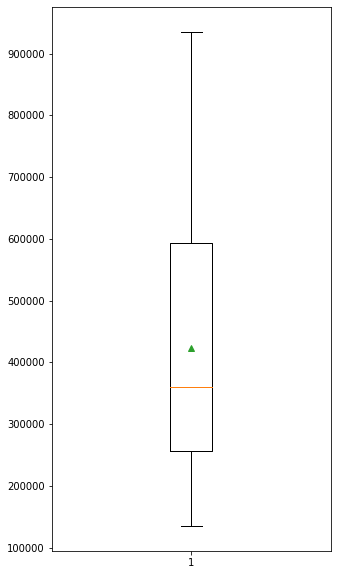

In [52]:
fig = plt.figure(figsize=(5,10))
plt.boxplot(df_lows['price'],showmeans=True)

Localizar os imóveis de maior ***price*** da area de 

#O que falta corrigir e fazer 
##Os lucros não estão concisos (fiz de duas formas com os codigos das Andreia/Alessa e teve o msmo resultado)
##***Correlações com o lucro ficaram bem baixas(discutir as razões) as outras colunas usadas para a correlação provavelmente não exercem nenhuma alteração para o lucro ou estamos com algum erro.***
#verificar com as colunas não numericas ou que foram removidas 
#o grafico de disperção parece ser mais significativo, verificar a importancia do local para a valorização e desvalorização do imóvel
#verificar a média do preço da area para achar casas abaixo do preço para verificar casas com maiores lucros
#descobrir a conclusao do projeto
# explicar detalhadamente como chegamos a conclusao que sao as 5 melhores e as 5 piores
#completar o relatorio do arquivo word miniprojeto_roofimoveis
#na descrição do deliverable está que precisa ser feito em formato do crispy-Dm, verificar alguma necessidade de adequação ou não
#é disponibilizado um power point para completarmos com o nosso deliverable< verificar a necessidade de utilizar ou não